In [1]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/51/31/72b8f5aa9ed9c4a6afd09c0bab491862ba5837facf7d81e1ed51a555ae8e/yfinance-0.2.44-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/86/20/2a2514d0b504e773078c38d664108bc8ae9056f85ea57c6fff86eee07331/frozendict-2.4.5-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 1.4 MB/s eta 0:00:02
     - -------------------------------------- 0.1/3.0 MB 1.4 MB/s eta 0:00:02
     --- ------------------------------------ 0.3/3.0 MB 2.0 MB/s

In [54]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Downloading stock data for DoorDash and competitors
tickers = ['DASH', 'UBER', 'TKWY.AS']  
data = yf.download(tickers, start="2022-10-01", end="2024-10-01")

[*********************100%***********************]  3 of 3 completed


In [56]:
# Normalize the 'Adj Close' price for each stock
normalized_data = pd.DataFrame()  
for ticker in tickers:
    normalized_data[ticker] = data['Adj Close'][ticker] / data['Adj Close'][ticker].iloc[0]
    
    

In [57]:
# Display the normalized data
print(normalized_data.head())

                               DASH      UBER   TKWY.AS
Date                                                   
2022-10-03 00:00:00+00:00  1.000000  1.000000  1.000000
2022-10-04 00:00:00+00:00  1.072051  1.092440  1.077902
2022-10-05 00:00:00+00:00  1.048892  1.092066  0.995803
2022-10-06 00:00:00+00:00  1.048892  1.112650  1.022426
2022-10-07 00:00:00+00:00  0.977633  1.050524  0.934557


### Calculating Stock Performance

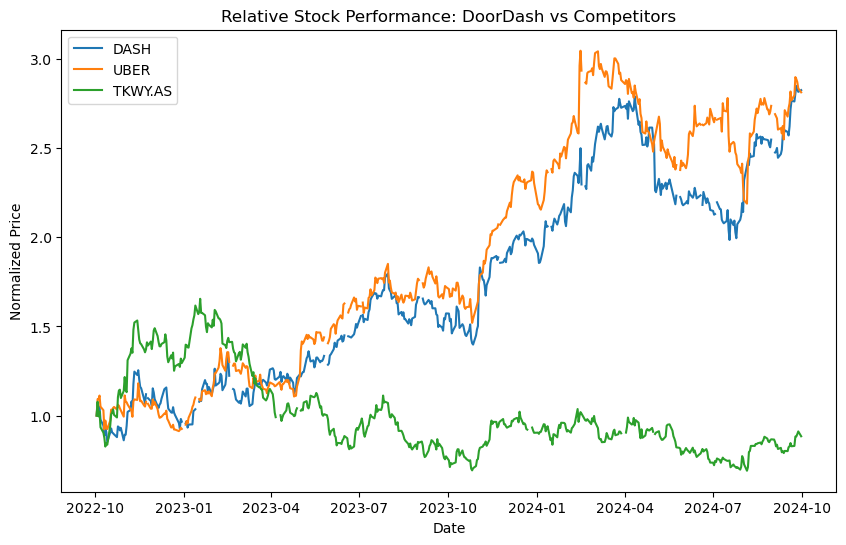

In [58]:
# Plotting the normalized prices of DoorDash and competitors
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(normalized_data.index, normalized_data[ticker], label=ticker)  # Ensure label=ticker
    
# Adding labels and title
plt.title('Relative Stock Performance: DoorDash vs Competitors')
plt.xlabel('Date')
plt.ylabel('Normalized Price')

# Add legend with proper labels
plt.legend()  # Make sure to call plt.legend() after setting the labels

# Show the plot
plt.show()

### Calculating Moving average


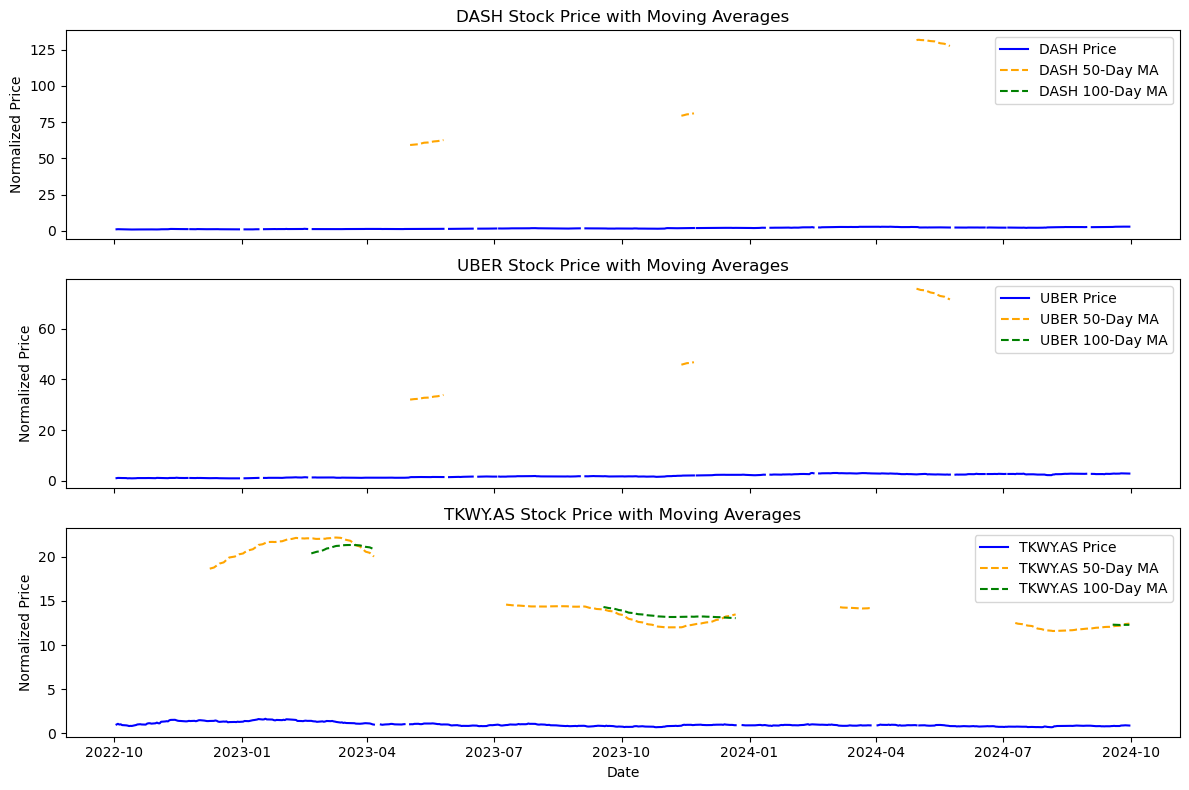

In [65]:
# Calculate 50-day and 100-day Moving Averages for each stock
moving_averages = pd.DataFrame()
for ticker in tickers:
    moving_averages[ticker + '_50_MA'] = data['Adj Close'][ticker].rolling(window=50).mean()
    moving_averages[ticker + '_100_MA'] = data['Adj Close'][ticker].rolling(window=100).mean()

# Create subplots for each stock
fig, axs = plt.subplots(len(tickers), figsize=(12, 8), sharex=True)

# Plotting normalized prices and moving averages
for i, ticker in enumerate(tickers):
    axs[i].plot(normalized_data.index, normalized_data[ticker], label=f'{ticker} Price', color='blue')
    axs[i].plot(moving_averages.index, moving_averages[ticker + '_50_MA'], '--', label=f'{ticker} 50-Day MA', color='orange')
    axs[i].plot(moving_averages.index, moving_averages[ticker + '_100_MA'], '--', label=f'{ticker} 100-Day MA', color='green')
    
    # Adding labels and title for each subplot
    axs[i].set_title(f'{ticker} Stock Price with Moving Averages')
    axs[i].set_ylabel('Normalized Price')
    axs[i].legend()

# Adding common labels and title
plt.xlabel('Date')
plt.tight_layout()
plt.show()
